In [23]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# wczytanie zbioru Wine
wine = load_wine()

# utworzenie DataFrame
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="class")

# Połączenie cech i etykiet
data = pd.concat([X, y], axis=1)

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [26]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [27]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [28]:
data["class"].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# skumulowana wariancja
explained_variance = np.cumsum(pca.explained_variance_ratio_)

explained_variance

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

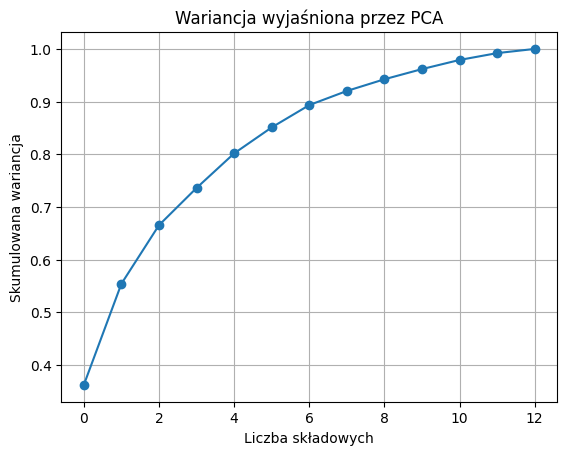

In [31]:
plt.plot(explained_variance, marker='o')
plt.xlabel("Liczba składowych")
plt.ylabel("Skumulowana wariancja")
plt.title("Wariancja wyjaśniona przez PCA")
plt.grid(True)
plt.show()

In [32]:
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

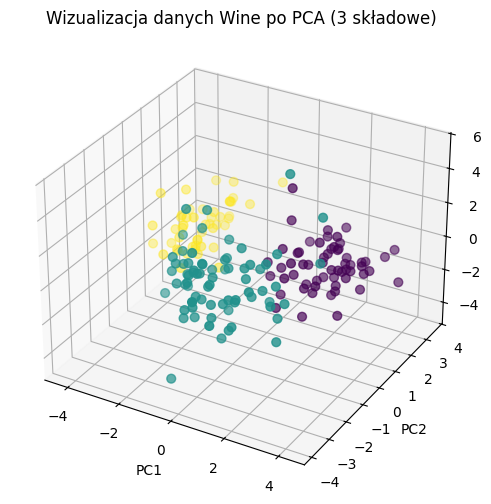

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_3[:, 0],
    X_pca_3[:, 1],
    X_pca_3[:, 2],
    c=y,
    cmap='viridis',
    s=40
)

ax.set_title("Wizualizacja danych Wine po PCA (3 składowe)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()

In [34]:
from sklearn.cluster import KMeans

kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(X_scaled)

In [35]:
from sklearn.metrics import silhouette_score

sil_original = silhouette_score(X_scaled, clusters_original)
sil_original

0.2848589191898987

In [36]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca_3)

In [37]:
sil_pca = silhouette_score(X_pca_3, clusters_pca)
sil_pca

0.45379998482576134

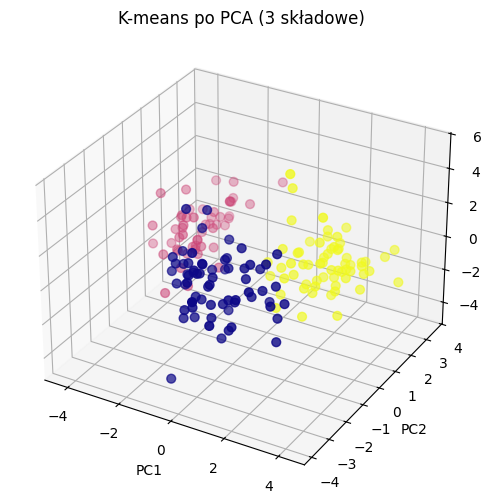

In [38]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_pca_3[:, 0],
    X_pca_3[:, 1],
    X_pca_3[:, 2],
    c=clusters_pca,
    cmap='plasma',
    s=40
)

ax.set_title("K-means po PCA (3 składowe)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()

In [39]:
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

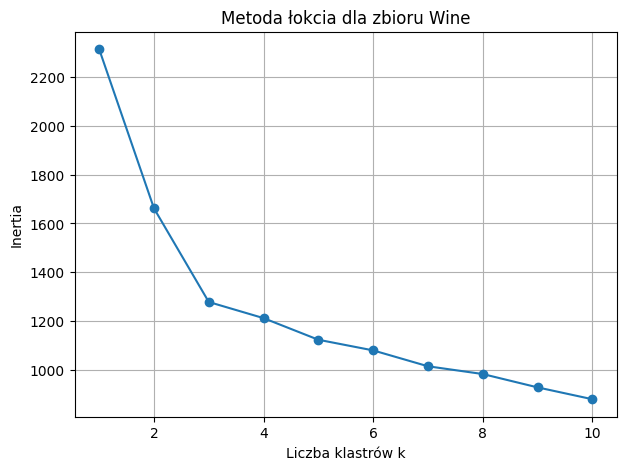

In [40]:
plt.figure(figsize=(7, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel("Liczba klastrów k")
plt.ylabel("Inertia")
plt.title("Metoda łokcia dla zbioru Wine")
plt.grid(True)
plt.show()

In [41]:
silhouette_values = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    silhouette_values.append(sil)

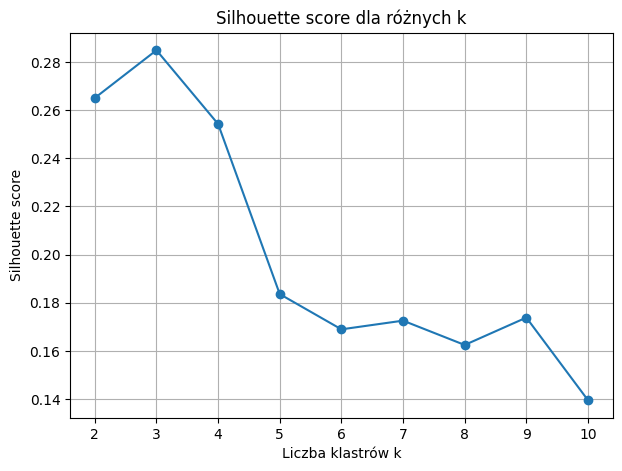

In [42]:
plt.figure(figsize=(7, 5))
plt.plot(range(2, 11), silhouette_values, marker='o')
plt.xlabel("Liczba klastrów k")
plt.ylabel("Silhouette score")
plt.title("Silhouette score dla różnych k")
plt.grid(True)
plt.show()

In [43]:
from scipy.cluster.hierarchy import linkage, dendrogram

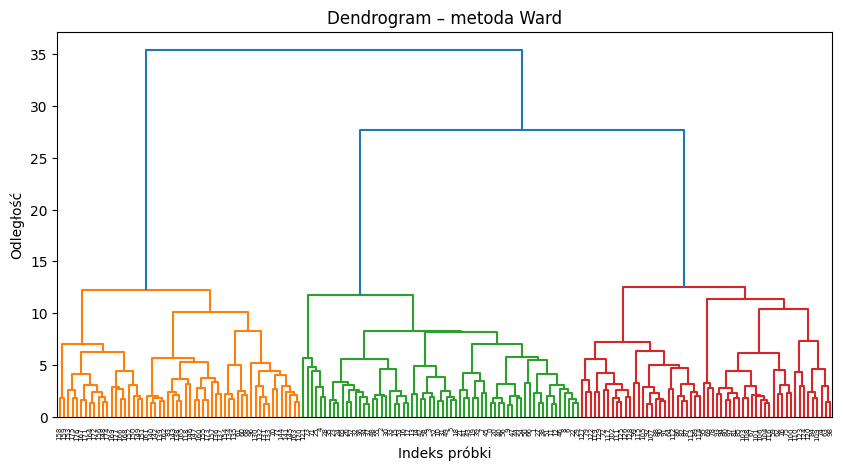

In [44]:
Z_ward = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z_ward)
plt.title("Dendrogram – metoda Ward")
plt.xlabel("Indeks próbki")
plt.ylabel("Odległość")
plt.show()

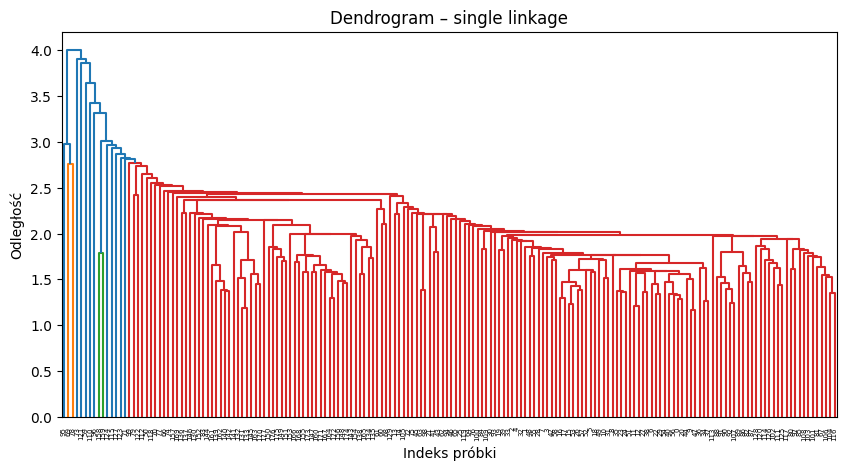

In [45]:
Z_single = linkage(X_scaled, method='single')

plt.figure(figsize=(10, 5))
dendrogram(Z_single)
plt.title("Dendrogram – single linkage")
plt.xlabel("Indeks próbki")
plt.ylabel("Odległość")
plt.show()

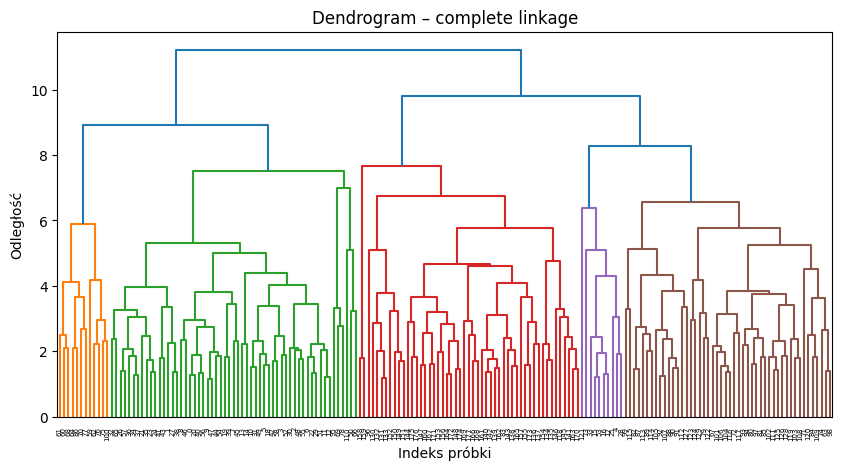

In [46]:
Z_complete = linkage(X_scaled, method='complete')

plt.figure(figsize=(10, 5))
dendrogram(Z_complete)
plt.title("Dendrogram – complete linkage")
plt.xlabel("Indeks próbki")
plt.ylabel("Odległość")
plt.show()

In [49]:
from scipy.cluster.hierarchy import fcluster
clusters_hier_3 = fcluster(Z_ward, t=3, criterion='maxclust')

In [50]:
sil_hier_3 = silhouette_score(X_scaled, clusters_hier_3)
sil_hier_3

0.2774439826952266

In [51]:
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

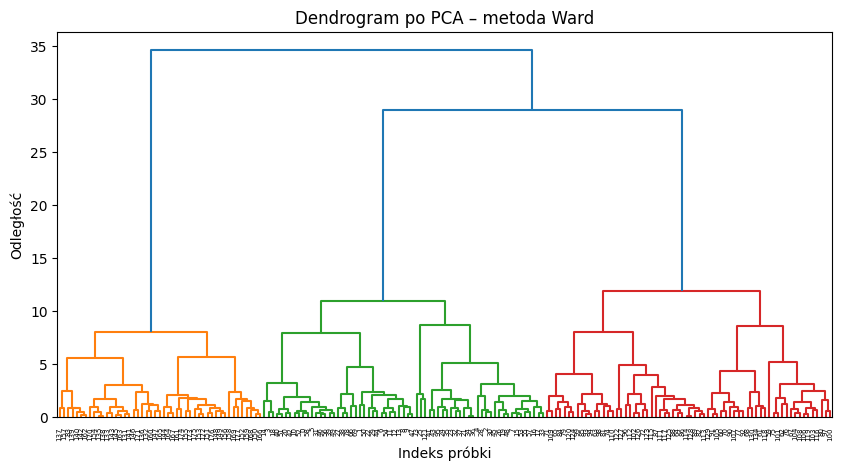

In [52]:
Z_pca_ward = linkage(X_pca_3, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z_pca_ward)
plt.title("Dendrogram po PCA – metoda Ward")
plt.xlabel("Indeks próbki")
plt.ylabel("Odległość")
plt.show()

In [53]:
clusters_pca_hier = fcluster(Z_pca_ward, t=3, criterion='maxclust')
sil_pca_hier = silhouette_score(X_pca_3, clusters_pca_hier)
sil_pca_hier

0.4459492198062966